In [1]:
# Project on REAL ESTATE PRICE PREDICTION

In [2]:
# importing libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# importing csv file
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# drop unnecessary columns
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
# changing column name
df2.rename(columns={"size": "bhk"}, inplace=True)
df2.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df3 = df2.copy()
df3.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# drop null location
df4 = df3[~(df3['location'].isna())]
df4.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# filling na values of bath column
df4['bath'].fillna(df4.bath.mean(), inplace=True)
df4.head()

C:\Users\GSPL - P8\AppData\Local\Temp\ipykernel_8624\3809900327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bath'].fillna(df4.bath.mean(), inplace=True)


,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df5 = df4.copy()
df5.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df5['bhk'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# replace alpha from bhk column
df5.replace({'bhk' : '[A-Za-z]',}, "", regex=True, inplace=True)

In [12]:
# converting bhk to float
df5['bhk'] = df5['bhk'].astype(float)

In [13]:
df5.isnull().sum()

location       0
bhk           16
total_sqft     0
bath           0
price          0
dtype: int64

In [14]:
df5.bhk.mean()

2.803728482297226

In [15]:
# filling na of bhk column
df5.bhk = df5.bhk.fillna(df5.bhk.mean())

In [16]:
df5.isnull().sum()

location      0
bhk           0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df6 = df5.copy()
df6.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056,2.0,39.07
1,Chikka Tirupathi,4.0,2600,5.0,120.00
2,Uttarahalli,3.0,1440,2.0,62.00
3,Lingadheeranahalli,3.0,1521,3.0,95.00
4,Kothanur,2.0,1200,2.0,51.00


In [18]:
df6.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def convertingToFloat(x):
    try:
        split = x.split("-")
        if len(split) == 2:
            return (float(split[0]) + float(split[1]))/2
        else:
            return float(x)
    except:
        return 0

In [20]:
# converting total_sqft values to float
df6['total_sqft'] = df6.total_sqft.apply(convertingToFloat)
df6.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


In [21]:
df7 = df6.copy()
df7.head()

,location,bhk,total_sqft,bath,price
0,Electronic City Phase II,2.0,1056.0,2.0,39.07
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00
2,Uttarahalli,3.0,1440.0,2.0,62.00
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00
4,Kothanur,2.0,1200.0,2.0,51.00


In [22]:
# feature engineering
df7['price_per_sqft'] = df7['price']*100000/df7['total_sqft']
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000


In [23]:
df7.location = df7.location.str.strip()
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000


In [24]:
# finding location counts
locs = df7.groupby('location')['location'].count().sort_values(ascending=False)
locs_less_than_10 = locs[locs<=10]
locs_greater_than_10 = locs[locs>10]

In [42]:
# changing location to others
df7.location = df7.location.apply(lambda x : 'Others' if x in locs_less_than_10 else x)
df7.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,6245.890861
4,Kothanur,2.0,1200.0,2.0,51.00,4250.000000


In [26]:
# removing area outlier
df8 = df7[~(df7.total_sqft/df7.bhk<300)]

In [27]:
def removePPSOutliers(df):
    df_out = pd.DataFrame()
    for keys, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df9 = removePPSOutliers(df8)
df9.shape

(10300, 6)

In [28]:
# removing bath outliers
df10 = df9[(df9['bath'] < (df9['bhk'] + 2))]
df10.shape

(10205, 6)

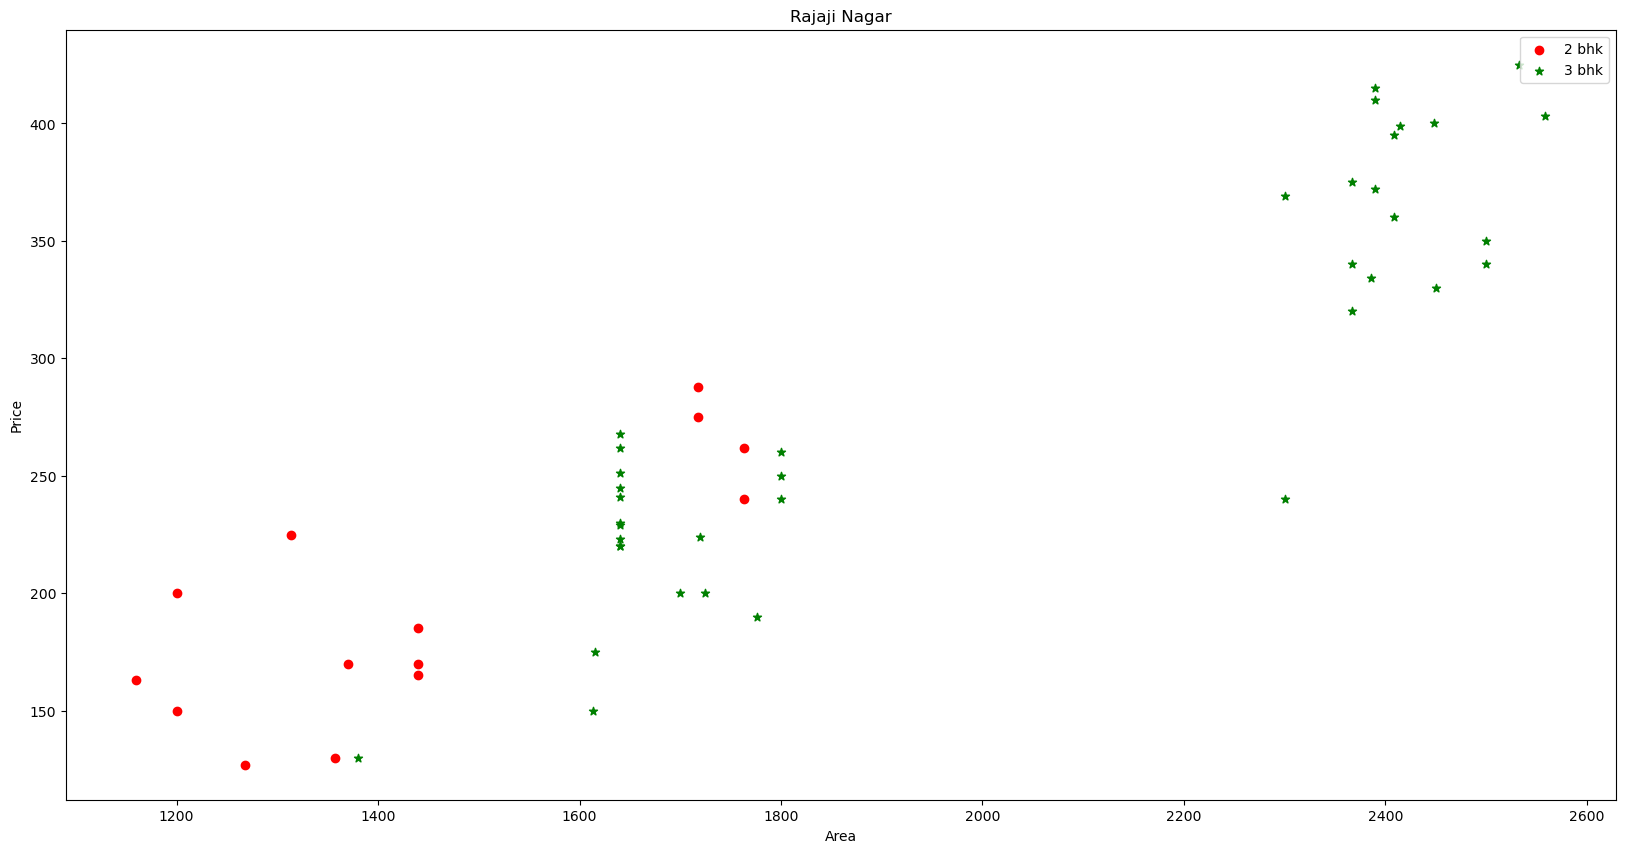

In [29]:
# showing price vs rooms outliers
def plotScatterChart(df, location):
    bhk_2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk_3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.scatter(bhk_2['total_sqft'], bhk_2['price'], color="red", label="2 bhk")
    plt.scatter(bhk_3['total_sqft'], bhk_3['price'], color="green", marker="*", label="3 bhk")
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.legend()
    plt.title(location)
    
plotScatterChart(df10, "Rajaji Nagar")

In [44]:
df10.shape

(10205, 6)

In [30]:
# removing price vs rooms outliers
def removePriceVsRoomOutliers(df):
    exclude_indices = np.array([])
    for loc_keys, loc_subdf in df.groupby('location'):
        bhk_stats = {}
        for bhk_keys, bhk_subdf in loc_subdf.groupby('bhk'):
            bhk_stats[bhk_keys] = {
                'mean' : np.mean(bhk_subdf.price_per_sqft),
                'std' : np.std(bhk_subdf.price_per_sqft),
                'count' : bhk_subdf.shape[0]
            }
        for bhk_keys, bhk_subdf in loc_subdf.groupby('bhk'):
            stats = bhk_stats.get(bhk_keys-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_subdf[bhk_subdf.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
        
df11 = removePriceVsRoomOutliers(df10)
df11.shape

(7294, 6)

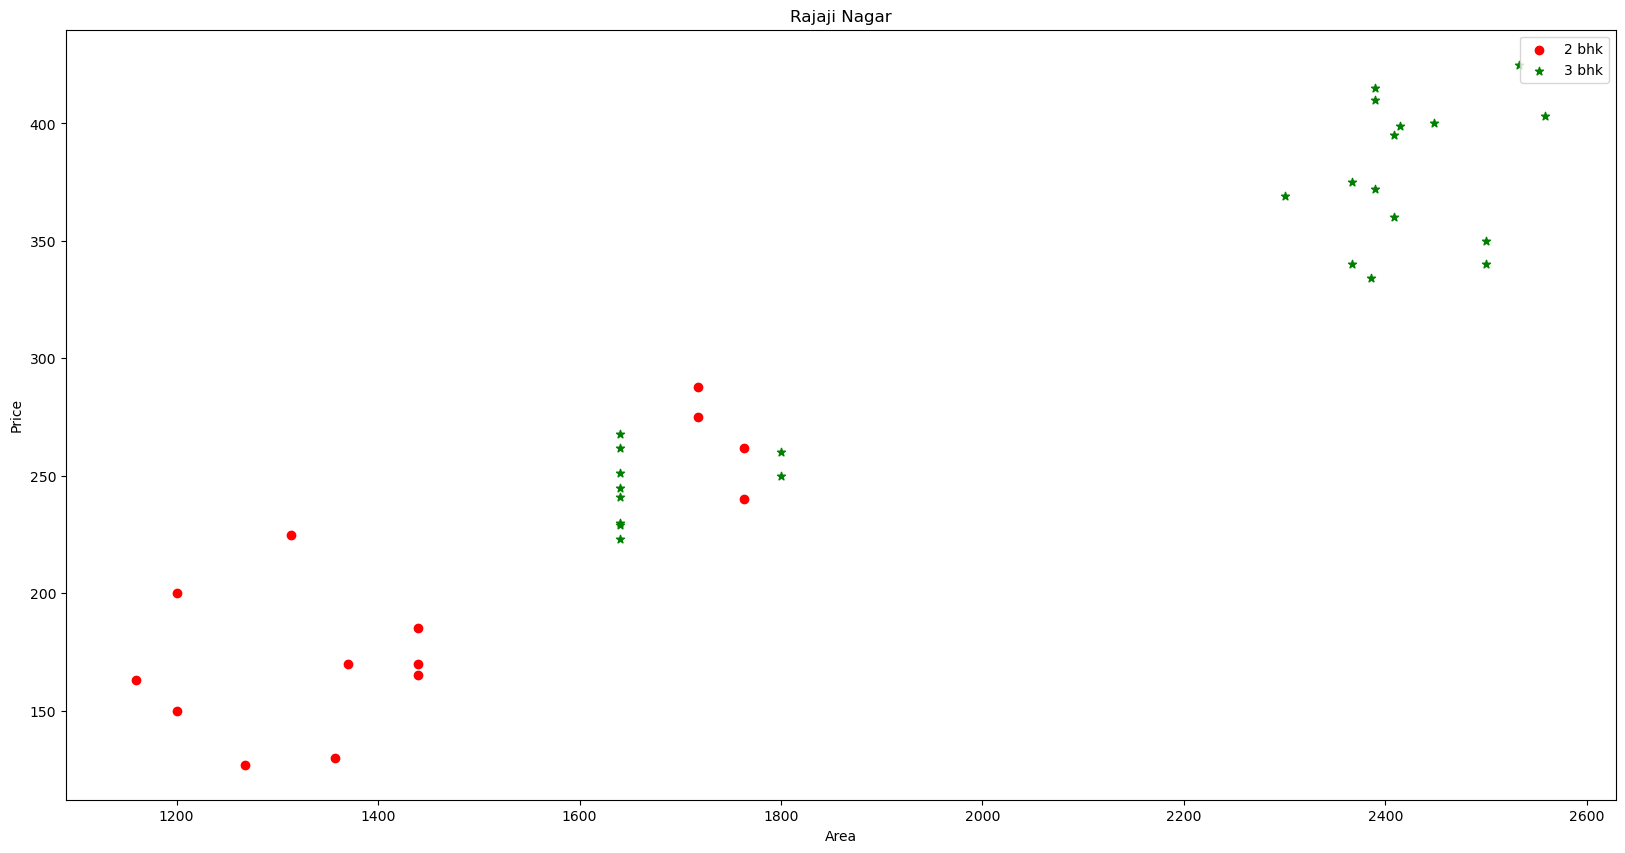

In [31]:
plotScatterChart(df11, "Rajaji Nagar")

In [32]:
df11.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0,15017.543860
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0,11901.840491
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0,12533.333333
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0,10833.333333
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0,11983.805668


In [33]:
# remove location text
dummies = pd.get_dummies(df11.location,dtype=int)
dummies.drop('Others', axis='columns', inplace=True)

In [34]:
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df12 = pd.concat([df11, dummies], axis='columns')
df12.head()

,location,bhk,total_sqft,bath,price,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,2850.0,4.0,428.0,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,1630.0,3.0,194.0,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3.0,1875.0,2.0,235.0,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3.0,1200.0,2.0,130.0,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,1235.0,2.0,148.0,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df12.drop(['location', 'price_per_sqft'], axis='columns', inplace=True)

In [37]:
inputs = df12.drop('price', axis='columns')
targets = df12.price

In [45]:
inputs.head()

,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
model.score(X_test, y_test)

0.8407883636632919

In [49]:
def prediction(location, sqrt, bath, bhk):
    loc_index = np.where(inputs.columns == location)
    print(loc_index)
    
    x = np.zeros(len(inputs.columns))
    x[0] = sqrt
    x[1] = bath
    x[2] = bhk
    print(x)
#     return model.predict([x])[0]

m = prediction("Electronic City Phase II", "1056", "2", "2")
print(m)

(array([82], dtype=int64),)
[1056.    2.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0